In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import math

general_data = pd.read_csv("ENB2012.csv")
general_data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


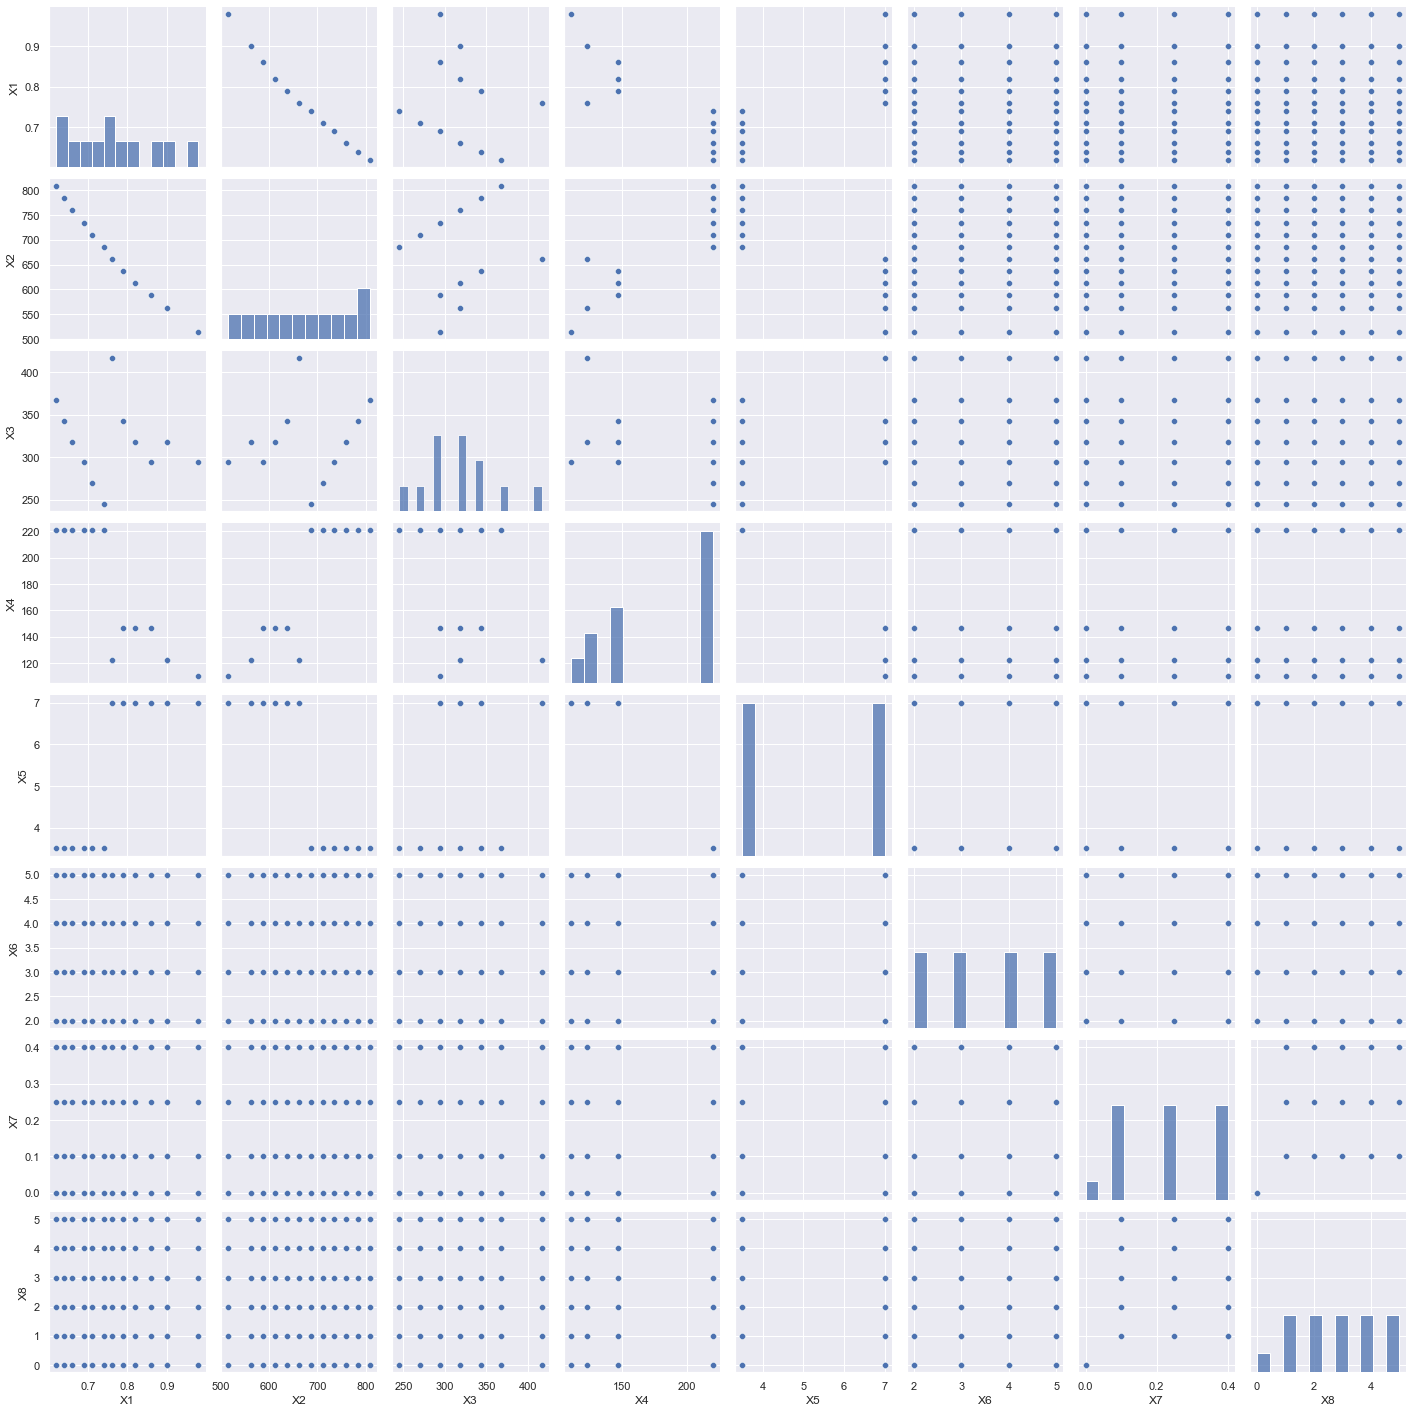

In [4]:
sns.set()
cols = ['X1', 'X2', 'X3', 'X4','X5','X6','X7','X8']
sns.pairplot(general_data[cols], height = 2.5)
plt.show();

In [5]:
general_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    int64  
 6   X7      768 non-null    float64
 7   X8      768 non-null    int64  
 8   Y1      768 non-null    float64
 9   Y2      768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [6]:
general_data.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307201,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090196,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


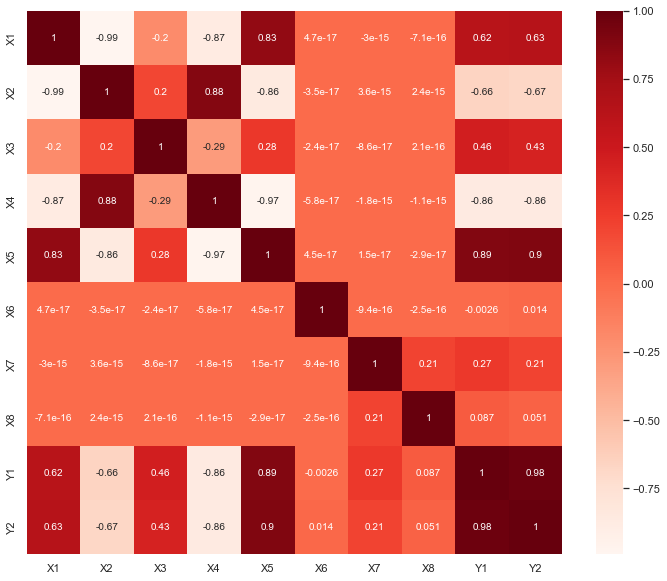

In [7]:
%matplotlib inline
plt.figure(figsize=(12,10))
cor = general_data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

D:\dimas\py\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


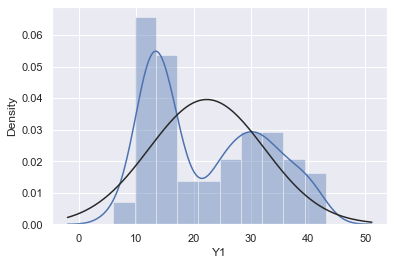

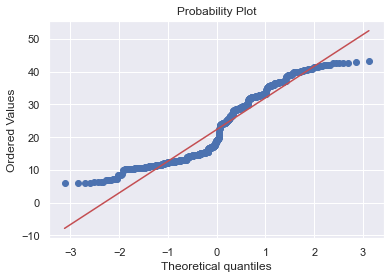

In [9]:
from scipy.stats import norm
from scipy import stats
sns.distplot(general_data['Y1'], fit=norm);
fig = plt.figure()
res = stats.probplot(general_data['Y1'], plot=plt)

D:\dimas\py\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


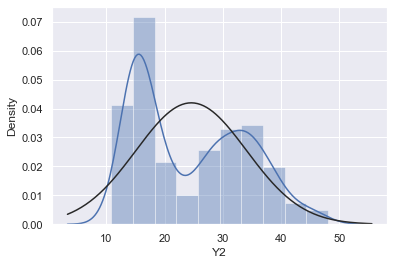

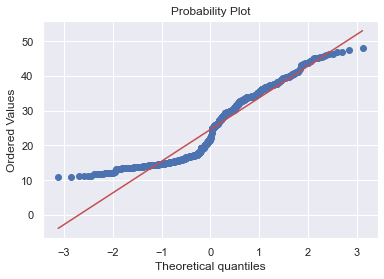

In [10]:
from scipy.stats import norm
from scipy import stats
sns.distplot(general_data['Y2'], fit=norm);
fig = plt.figure()
res = stats.probplot(general_data['Y2'], plot=plt)

In [12]:
general_data.iloc[:, :-2]

,X1,X2,X3,X4,X5,X6,X7,X8
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0
...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5


In [18]:
general_data.iloc[:, [8,9]]

,Y1,Y2
0,15.55,21.33
1,15.55,21.33
2,15.55,21.33
3,15.55,21.33
4,20.84,28.28
...,...,...
763,17.88,21.40
764,16.54,16.88
765,16.44,17.11
766,16.48,16.61


In [20]:
X = general_data.iloc[:, :-2].values
y = general_data.iloc[:, [8,9]].values

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection  import train_test_split
#no of features
nof_list=np.arange(1,4)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)
    model = LinearRegression()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 3
Score with 3 features: 0.897836


D:\dimas\py\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=1 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
D:\dimas\py\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=2 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
D:\dimas\py\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=3 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [22]:
RFE_regressor = LinearRegression()
rfe = RFE(RFE_regressor, 3)
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  
#Fitting the data to model
RFE_regressor.fit(X,y)
print(rfe.support_)
print(rfe.ranking_)

[False  True  True  True False False False False]
[2 1 1 1 4 6 3 5]


D:\dimas\py\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=3 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [30]:
RFE_features=X[:,[1,2,3]]

In [31]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [32]:
print("score: ",regressor.score(X_train,y_train))
print("Model slope:    ", regressor.coef_)
print("Model intercept:", regressor.intercept_)

score:  0.9012930037471222
Model slope:     [[-5.61917690e+01 -5.59395433e-02  4.02059525e-02 -4.80727479e-02
   3.99271436e+00 -5.80752067e-02  1.94139741e+01  1.73971787e-01]
 [-6.42094267e+01 -6.01059730e-02  2.55229955e-02 -4.28144842e-02
   4.21026016e+00  1.32796083e-01  1.43883341e+01  1.03879132e-02]]
Model intercept: [72.70840138 87.58799129]


In [33]:
y_pred = regressor.predict(X_test)
print("score: ",regressor.score(X_test,y_test))
print("Model slope:    ", regressor.coef_)
print("Model intercept:", regressor.intercept_)

score:  0.9024652814089946
Model slope:     [[-5.61917690e+01 -5.59395433e-02  4.02059525e-02 -4.80727479e-02
   3.99271436e+00 -5.80752067e-02  1.94139741e+01  1.73971787e-01]
 [-6.42094267e+01 -6.01059730e-02  2.55229955e-02 -4.28144842e-02
   4.21026016e+00  1.32796083e-01  1.43883341e+01  1.03879132e-02]]
Model intercept: [72.70840138 87.58799129]
